In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = {}
for symbol in ['QQQ', 'TQQQ', 'USD', 'SMH','NVDA','SOXL']: #, 'FNGS', 'NVDA']:
    results = []
    files = sorted([f'{f:>7}' for f in os.listdir(f'data/{symbol}')])
    for f in files:
        f = f.strip()
        df = pd.read_csv(f'data/{symbol}/{f}')
        if len(df) < 5:
            results.append(None)
            continue
        df.start_date = pd.to_datetime(df.start_date)
        df.end_date = pd.to_datetime(df.end_date)
        df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
        call_profits = df.call_end_price / df.call_start_price-1
        mean_call_profit = call_profits.mean()
        annual_call_profit = (call_profits / df.TTL * 52).mean()
        positive_ratio = (call_profits > 0).mean()
        call_leverage  = (df.call_strike_price / df.call_start_price).median()
        results.append({
            'profit': mean_call_profit * 100,
            'positive': positive_ratio * 100,
            'score': mean_call_profit * positive_ratio * 100,
            'trades': len(df),
        })
    
    data[symbol] = results

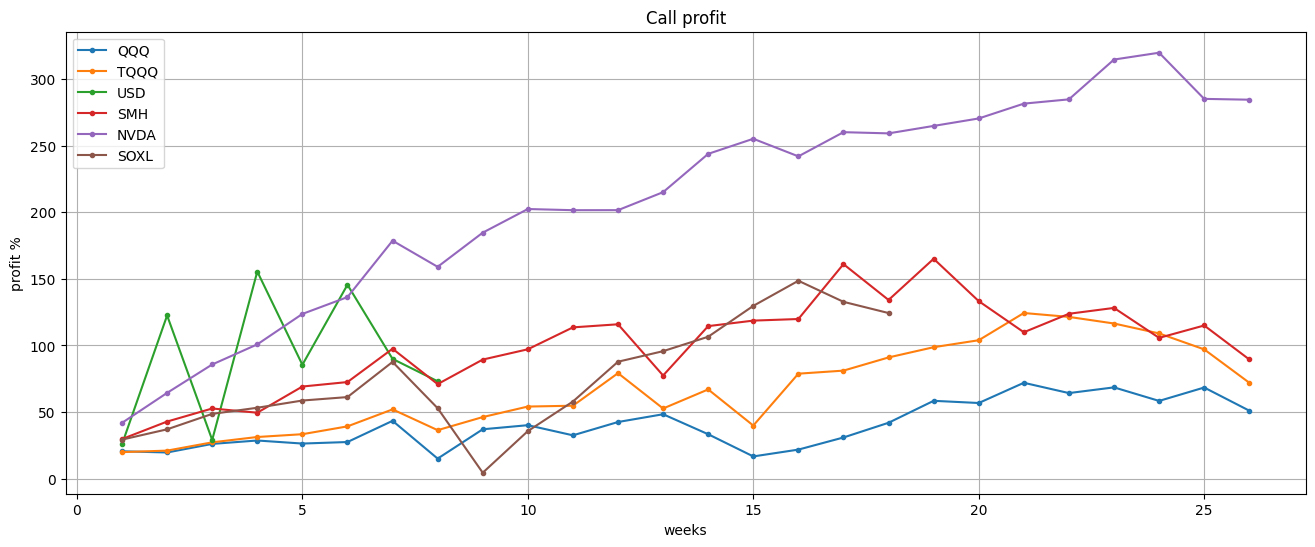

In [9]:
plt.figure(figsize=(16,6))

for symbol in data:
    plt.plot([None]+[r and r['profit'] for r in data[symbol]], label=symbol, marker='.')

plt.legend(loc='best')
plt.title('Call profit')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

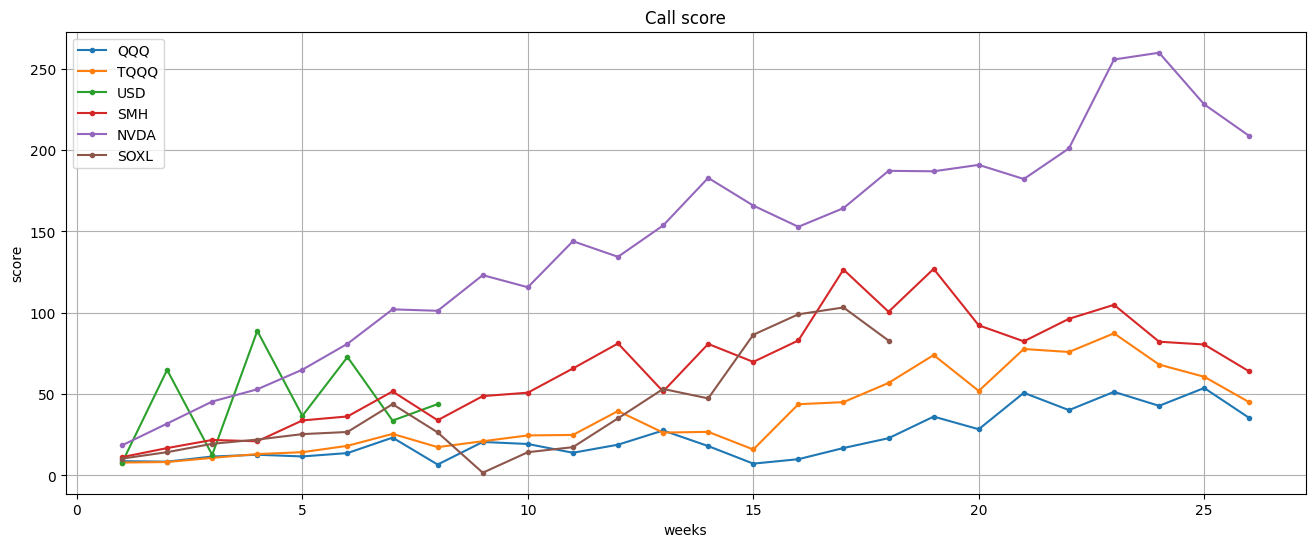

In [10]:
plt.figure(figsize=(16,6))

for symbol in data:
    plt.plot([None]+[r and r['score'] for r in data[symbol]], label=symbol, marker='.')

plt.legend(loc='best')
plt.title('Call score')
plt.xlabel('weeks')
plt.ylabel('score')
plt.grid()
plt.show()

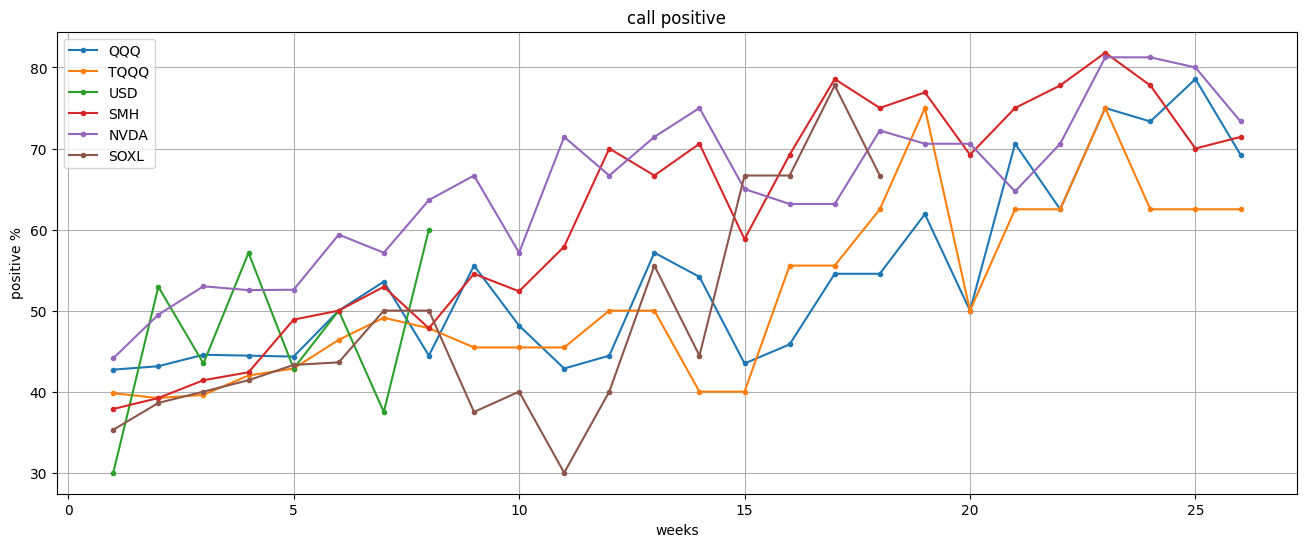

In [11]:
plt.figure(figsize=(16,6))

for symbol in data:
    plt.plot([None]+[r and r['positive'] for r in data[symbol]], label=symbol, marker='.')

plt.legend(loc='best')
plt.title('call positive')
plt.xlabel('weeks')
plt.ylabel('positive %')
plt.grid()
plt.show()

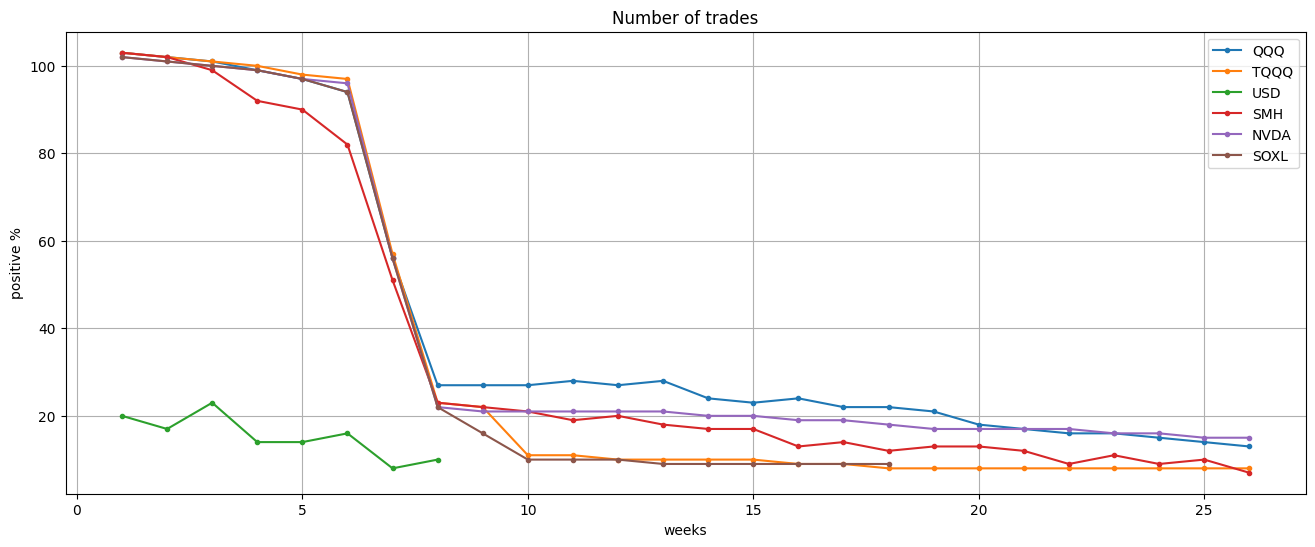

In [12]:
plt.figure(figsize=(16,6))

for symbol in data:
    plt.plot([None]+[r and r['trades'] for r in data[symbol]], label=symbol, marker='.')

plt.legend(loc='best')
plt.title('Number of trades')
plt.xlabel('weeks')
plt.ylabel('positive %')
plt.grid()
plt.show()